# Logistic Regression From Scratch

Complete implementation including data loading, preprocessing, training, and evaluation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("logistic_data (1).csv")
df.head()

,Avg weight of granules (g),Total surface area (cm^2),Viable as a catalyst
0,210,329,1
1,366,476,0
2,185,407,1
3,169,354,1
4,147,315,0


In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
# Convert categorical/boolean columns using one-hot encoding
for col in X.columns:
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)

X = pd.get_dummies(X, drop_first=True)

X = X.values.astype(float)
y = y.values.astype(float)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
def z_score(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [7]:
X_train, x_mean, x_std = z_score(X_train)
X_test = (X_test - x_mean) / x_std

In [8]:
class LogisticRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(X @ self.weights + self.bias)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    def fit(self, X, y, epochs=1000, learning_rate=0.01, threshold=1e-6):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        prev_loss = float('inf')

        for _ in range(epochs):
            y_pred = self.predict_proba(X)
            loss = -np.mean(
                y * np.log(y_pred + 1e-9) +
                (1 - y) * np.log(1 - y_pred + 1e-9)
            )
            dw = (1 / n_samples) * (X.T @ (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
            if abs(prev_loss - loss) < threshold:
                break
            prev_loss = loss

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [10]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)

Accuracy: 0.65


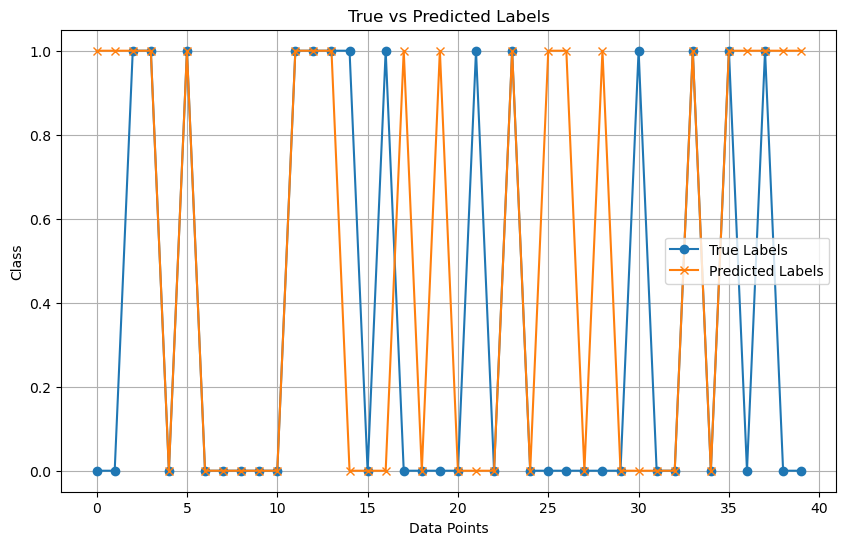

In [11]:
indices = np.arange(len(y_test))
plt.figure(figsize=(10,6))
plt.plot(indices, y_test, label='True Labels', marker='o')
plt.plot(indices, y_pred, label='Predicted Labels', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Class')
plt.title('True vs Predicted Labels')
plt.legend()
plt.grid(True)
plt.show()